In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#create variables for lat and longitute
#latitude
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
#longitude
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
#create zip files for the output
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# 6.1.4: Add the latitudes and longitudes to a list. Unpack the zip file made in API_practice
#can only unzip a tupple once before it is removed from memory

coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-38.98524978697243 -142.94509337912248
6.4476410897265595 -149.48305574687708
54.58120213697333 -64.12312808011117
-37.08767679898526 99.22711563103934
-11.700122553872347 148.42611655028986
32.00070876462776 -142.76159996726795
-49.904095239343185 104.8517154910038
54.37641917142517 -150.10649192483987
-16.362538058342594 26.47954020741608
41.35549182460704 96.59593809668337
-27.069924499541457 -23.634764207847525
13.669784917350839 3.8579883742249024
9.683693332842552 -79.77429909041767
48.398784688606156 -29.15808245447539
28.36354935932097 -153.11483557611314
72.24582065827187 -179.03707242229294
62.29680996677271 -42.08039256443806
83.080405366516 112.72543019751907
30.56131292321207 143.91647555452658
28.835099684526313 -110.39749191808512
-40.278680560024455 -50.85286497654161
61.249749368083656 155.61270710926584
80.38351033069904 23.93213435328724
19.231648212407322 0.12937727146166367
16.462439154296973 5.002298272592498
-60.96556036433515 -104.09014491641477
-34.672872909867

-69.49792921548921 -13.457474418490932
-47.54084858513951 28.81995151005725
-70.6150719278724 -63.834955601182585
-69.5094803907444 34.06908712207388
44.1300363322095 -146.22885446482718
-34.63058102901641 179.1859863968321
71.86292283272113 37.30070481389595
-58.74856606697365 -59.6617995526951
-50.01323190993502 170.9978111387258
66.1395513894106 -29.111372423178125
-34.92405768630451 -51.29039727632886
6.6489115306879825 172.30183370362403
23.727864823138304 -63.8634859423769
7.096377584973055 -100.8370401699262
-6.813807525728677 134.65718810939188
-72.13646202397688 108.0672920226985
10.66065033844167 50.83457702828605
-76.66780008584128 170.44943051771048
28.133805080820565 133.69219033624273
-78.0421683935761 135.83180293097854
-23.820754616008742 -9.970248877544492
43.536344987143394 -136.23600248410202
3.720614346614269 37.52044358066149
-74.41152582535172 -8.434513546159621
-77.64307141892493 145.40804997675576
-6.110674779005677 147.53237995447068
-15.444720313854376 -12.328

56.29911270556008 135.9883761953809
-61.97671351604315 27.50466821105573
-16.793927659458532 -107.03915359106499
-67.12085242359528 66.03704422381307
46.26349116483394 138.2694972721938
43.648910098548185 -28.52314063281105
-43.19034012920233 38.95234867119132
79.60838320817388 100.16634888180664
21.60669439627678 83.67797969653094
-72.68200470085557 34.930145015397386
-45.59283828575397 79.01477019679925
-57.22358002170117 131.59555236449182
-41.54020908391388 -142.87073038526813
53.01498649979382 73.22957905283693
83.09696531806603 -162.22861464232855
51.978008803060305 -167.48943065315032
-25.925253180456536 -108.69696009676306
-87.08717840684662 -21.318090178415076
53.03953520200969 26.843148909013877
-80.28580436199591 66.51081379948934
-67.29204853621488 -13.289416892278666
-28.398946980136294 -176.6514241600802
-76.17716555924542 -122.42432651782349
-37.69619660341989 56.714019707959096
-59.03289001211648 -32.62252168614785


In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

590

Pseudocode for what we need to do

* We will need to do the following:
* Import our dependencies and initialize counters and an empty list that will hold the weather data.
* Loop through the cities list.
* Group the cities in sets of 50 to log the process as we find the weather data for each city.
* Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
* Build the city_url or endpoint for each city.
* Log the URL and the record and set numbers.
* Make an API request for each city.
* Parse the JSON weather data for the following:
* City, country, and date
* Latitude and longitude
* Maximum temperature
* Humidity
* Cloudiness
* Wind speed
* Add the data to a list in a dictionary format and then convert the list to a DataFrame.



In [7]:
# import request library and api key

#import time
from datetime import datetime

#import time, stackoverflow.com/questions/3421290/ for "time" not be defined below in time.sleep
import time

#import the request library
import requests

#import API key
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
#create an empty list to hold weather data
city_data = []

#print the start of the logging
print('Begining Data Retrieval')
print('-----------------------')

#create counters
#initialized the counters at 1 because we want the first iteration of 
#the logging for each recorded response and the set to start at 1
record_count = 1
set_count = 1


Begining Data Retrieval
-----------------------


In [10]:
# loop through all the cities in list

for i in range(len(cities)):
    #group cities in sets of 50
    if (i % 50 == 0 and 1>=50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    #create endpoint URL with each city
    city_url = url + '&q=' + cities[i]

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | havre-saint-pierre
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | alotau
City not found. Skipping...
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | namwala
Processing Record 8 of Set 1 | yumen
Processing Record 9 of Set 1 | vila velha
Processing Record 10 of Set 1 | dogondoutchi
Processing Record 11 of Set 1 | portobelo
Processing Record 12 of Set 1 | lagoa
Processing Record 13 of Set 1 | kahului
Processing Record 14 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 15 of Set 1 | nanortalik
Processing Record 16 of Set 1 | saskylakh
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | ures
Processing Record 19 of Set 1 | rocha
Processing Record 20 of Set 1 | omsukchan
Processing Record 21 of Set 1 | longyearbyen
Processing Record 22 of Set 1 | tessalit
Processing Record 23 of Set 1 | tahoua
Process

Processing Record 42 of Set 4 | tual
Processing Record 43 of Set 4 | mount gambier
Processing Record 44 of Set 4 | padang
Processing Record 45 of Set 4 | puteyets
Processing Record 46 of Set 4 | mahebourg
Processing Record 47 of Set 4 | khandyga
Processing Record 48 of Set 4 | barbar
City not found. Skipping...
Processing Record 49 of Set 4 | laguna
Processing Record 50 of Set 4 | maceio
Processing Record 1 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 2 of Set 5 | cumra
Processing Record 3 of Set 5 | cayenne
Processing Record 4 of Set 5 | buraydah
Processing Record 5 of Set 5 | cabo san lucas
Processing Record 6 of Set 5 | saldanha
Processing Record 7 of Set 5 | patiya
Processing Record 8 of Set 5 | peabiru
Processing Record 9 of Set 5 | tasbuget
City not found. Skipping...
Processing Record 10 of Set 5 | inzhavino
Processing Record 11 of Set 5 | skibbereen
Processing Record 12 of Set 5 | kutum
Processing Record 13 of Set 5 | cairns
Processing Record 

Processing Record 29 of Set 8 | jhargram
Processing Record 30 of Set 8 | alofi
Processing Record 31 of Set 8 | vestmannaeyjar
Processing Record 32 of Set 8 | nishihara
Processing Record 33 of Set 8 | marcona
City not found. Skipping...
Processing Record 34 of Set 8 | izazi
Processing Record 35 of Set 8 | suntar
Processing Record 36 of Set 8 | dunedin
Processing Record 37 of Set 8 | hongjiang
Processing Record 38 of Set 8 | pau dos ferros
Processing Record 39 of Set 8 | san cristobal
Processing Record 40 of Set 8 | malakal
Processing Record 41 of Set 8 | lloro
Processing Record 42 of Set 8 | santa josefa
Processing Record 43 of Set 8 | saint-georges
Processing Record 44 of Set 8 | sabrum
Processing Record 45 of Set 8 | port antonio
Processing Record 46 of Set 8 | sena madureira
Processing Record 47 of Set 8 | karratha
Processing Record 48 of Set 8 | mehran
Processing Record 49 of Set 8 | waipawa
Processing Record 50 of Set 8 | lishan
Processing Record 1 of Set 9 | haibowan
City not foun

Processing Record 16 of Set 12 | omaruru
Processing Record 17 of Set 12 | ahtopol
Processing Record 18 of Set 12 | puerto madero
Processing Record 19 of Set 12 | manicore
Processing Record 20 of Set 12 | vitim
Processing Record 21 of Set 12 | thilogne
City not found. Skipping...
Processing Record 22 of Set 12 | gambela
Processing Record 23 of Set 12 | makakilo city
Processing Record 24 of Set 12 | gomel
Processing Record 25 of Set 12 | beloha
Processing Record 26 of Set 12 | el sauzal
Processing Record 27 of Set 12 | kingman
Processing Record 28 of Set 12 | itarema
Processing Record 29 of Set 12 | vao
Processing Record 30 of Set 12 | fethiye
Processing Record 31 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 32 of Set 12 | mount isa
Processing Record 33 of Set 12 | kayes
Processing Record 34 of Set 12 | puquio
Processing Record 35 of Set 12 | cozumel
Processing Record 36 of Set 12 | bairiki
Processing Record 37 of Set 12 | mayna
Processing Record 38 of Set 12 | hira

In [12]:
print(len(city_data))

539


In [13]:
#6.2.7 create DF by converting array of dictionaries
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,48.47,97,97,1.41,NZ,2022-05-09 19:33:30
1,Hilo,19.7297,-155.0900,83.28,72,40,3.00,US,2022-05-09 19:30:51
2,Havre-Saint-Pierre,50.2334,-63.5986,55.76,35,0,9.22,CA,2022-05-09 19:33:30
3,Busselton,-33.6500,115.3333,55.35,88,6,2.73,AU,2022-05-09 19:33:31
4,Kodiak,57.7900,-152.4072,44.11,49,75,18.41,US,2022-05-09 19:33:31
5,Namwala,-15.7504,26.4384,67.23,53,51,3.91,ZM,2022-05-09 19:33:32
6,Yumen,40.2833,97.2000,54.57,21,100,9.82,CN,2022-05-09 19:33:32
7,Vila Velha,-20.3297,-40.2925,78.75,57,40,16.11,BR,2022-05-09 19:33:32
8,Dogondoutchi,13.6393,4.0287,94.86,27,53,8.68,NE,2022-05-09 19:33:33
9,Portobelo,9.5500,-79.6500,87.75,75,48,6.96,PA,2022-05-09 19:33:33


In [14]:
#re-order the columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 
                    'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2022-05-09 19:33:30,-46.1927,168.8643,48.47,97,97,1.41
1,Hilo,US,2022-05-09 19:30:51,19.7297,-155.0900,83.28,72,40,3.00
2,Havre-Saint-Pierre,CA,2022-05-09 19:33:30,50.2334,-63.5986,55.76,35,0,9.22
3,Busselton,AU,2022-05-09 19:33:31,-33.6500,115.3333,55.35,88,6,2.73
4,Kodiak,US,2022-05-09 19:33:31,57.7900,-152.4072,44.11,49,75,18.41


In [15]:
#create output file for csv
output_data_file = "weather_data/cities.csv"

#export the city_data_df into CSV
city_data_df.to_csv(output_data_file, index_label ='city_id')

In [20]:
#start at 6.3.1
#extract data for plotting

lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [23]:
#already imported the time module
#get today's date in seconds

today = time.strftime('%x')
today

'05/09/22'

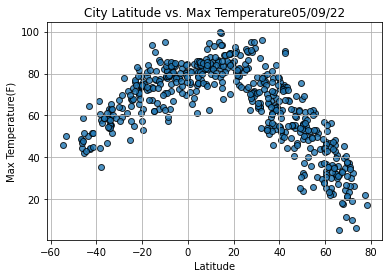

In [26]:
#build scatter plot for lat
plt.scatter(lats, max_temps, edgecolor = 'black', 
            linewidths = 1, marker = 'o',
           alpha = 0.8, label = 'Cities')

#incorporate other graph ppty
plt.title(f'City Latitude vs. Max Temperature' + time.strftime('%x'))
plt.ylabel('Max Temperature(F)')
plt.xlabel('Latitude')
plt.grid(True)

#save figure
plt.savefig('weather_data/Fig1.png')

#show plot
plt.show()

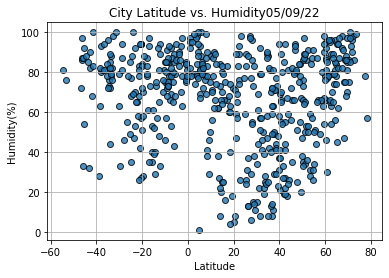

In [28]:
#humidity scatter plot

plt.scatter(lats, humidity, edgecolor='black',
           linewidth = 1, marker = 'o',
           alpha =0.8, label = 'Cities')

#add other graph pptys
plt.title(f'City Latitude vs. Humidity' + time.strftime('%x'))
plt.ylabel('Humidity(%)')
plt.xlabel('Latitude')
plt.grid(True)

#save figure
plt.savefig('weather_data/Fig2.png')

#show plot
plt.show()

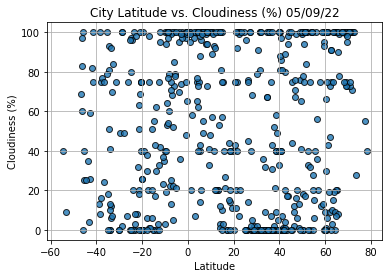

In [31]:
# scatter plot for cloudiness

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


#add other plt pptys
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()
    

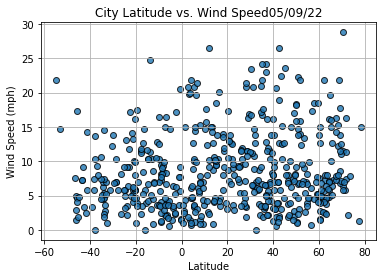

In [33]:
#scatter plot - lat vs wind speed

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#other pptys
plt.title(f'City Latitude vs. Wind Speed' + time.strftime("%x"))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

#save figure
plt.savefig('weather_data/fig4.png')

#show plot
plt.show()

In [106]:
#plot the equation
#import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import linregress

#create a function to perform lin regress & plot data

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):


   # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    #added white font color
    plt.title(title, color='w')
    plt.xlabel('Latitude', color='w')
    plt.ylabel(y_label, color= 'w')
    plt.show()
    
    # add a line to print r value (not in directions)
    print(f'the r-value is: {r_value: .3f}')
# need to add data for the plot to show

In [107]:
# using loc on df to get some data to plot

city_data_df.loc[(city_data_df['Lat']>=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Hilo,US,2022-05-09 19:30:51,19.7297,-155.0900,83.28,72,40,3.00
2,Havre-Saint-Pierre,CA,2022-05-09 19:33:30,50.2334,-63.5986,55.76,35,0,9.22
4,Kodiak,US,2022-05-09 19:33:31,57.7900,-152.4072,44.11,49,75,18.41
6,Yumen,CN,2022-05-09 19:33:32,40.2833,97.2000,54.57,21,100,9.82
8,Dogondoutchi,NE,2022-05-09 19:33:33,13.6393,4.0287,94.86,27,53,8.68


In [108]:
#create new df from info we pulled
northern_hemi_df = city_data_df.loc[(city_data_df['Lat']>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat']<0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Hilo,US,2022-05-09 19:30:51,19.7297,-155.0900,83.28,72,40,3.00
2,Havre-Saint-Pierre,CA,2022-05-09 19:33:30,50.2334,-63.5986,55.76,35,0,9.22
4,Kodiak,US,2022-05-09 19:33:31,57.7900,-152.4072,44.11,49,75,18.41
6,Yumen,CN,2022-05-09 19:33:32,40.2833,97.2000,54.57,21,100,9.82
8,Dogondoutchi,NE,2022-05-09 19:33:33,13.6393,4.0287,94.86,27,53,8.68


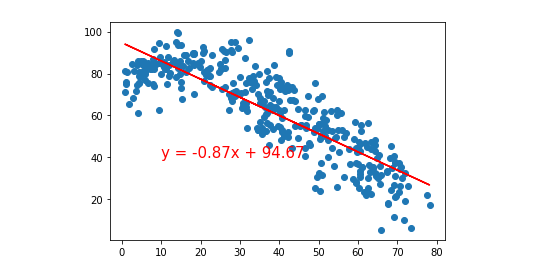

the r-value is: -0.851


In [109]:
#perform line regress for north hemi

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


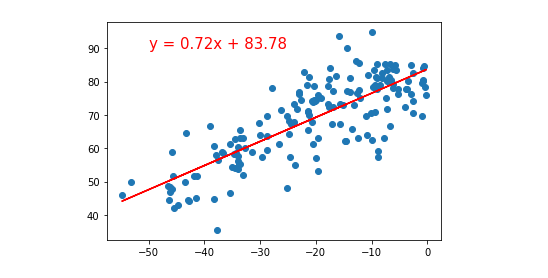

the r-value is:  0.795


In [110]:
#perform line regress on south hemi
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

#call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern\
                       Hemisphere for Maximum Temperature',
                      'Max Temp', (-50,90))

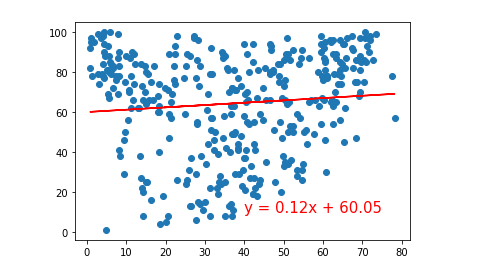

the r-value is:  0.095


In [111]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

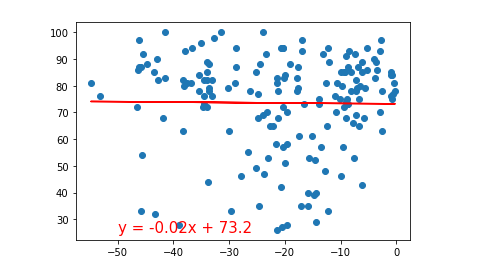

the r-value is: -0.012


In [112]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,25))
#changed to -50, 25 because eq did not show when -50,15

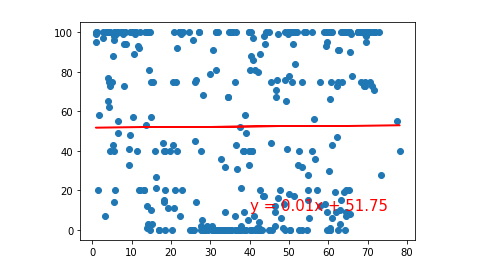

the r-value is:  0.007


In [113]:
#6.4 skill drill refactor code to show for cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', 'Cloudiness',(40,10))

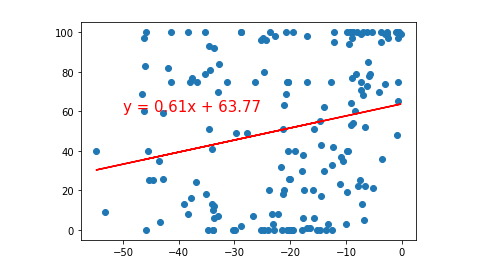

the r-value is:  0.220


In [114]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


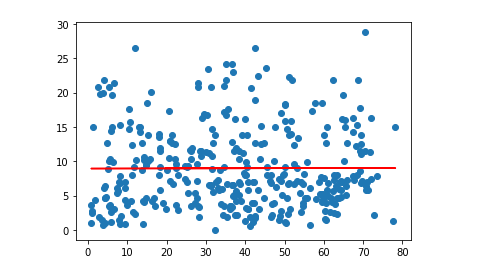

the r-value is:  0.003


In [115]:
#linear regression for north and wind speed

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

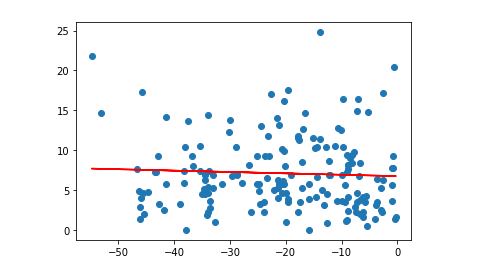

the r-value is: -0.051


In [116]:
# Linear regression on south and wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [ ]:
#6.5.2 create heatmaps for weather params
